In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('customer_data.csv')
print(data.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [3]:
data = data.select_dtypes(include='number')
data.dropna(inplace=True,axis=0)
data.shape

(64374, 9)

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X=scaled_data)

In [9]:
kmeans_inertia = kmeans.inertia_
kmeans_sil_score = silhouette_score(scaled_data,kmeans_labels)
kmeans_dbi = davies_bouldin_score(scaled_data,kmeans_labels)

print("kmeans intertia:",kmeans_inertia)
print(f"silhouette_score:{kmeans_sil_score}")
print(f"davis bound:{kmeans_dbi}")


kmeans intertia: 466430.66138949373
silhouette_score:0.1887138676037067
davis bound:1.991357080795375


In [ ]:
true_labels = data["Churn"]
kmeans_ari = adjusted_rand_score(true_labels,kmeans_labels)
print(f"ari:{kmeans_ari}")

ari:0.9641013188641777


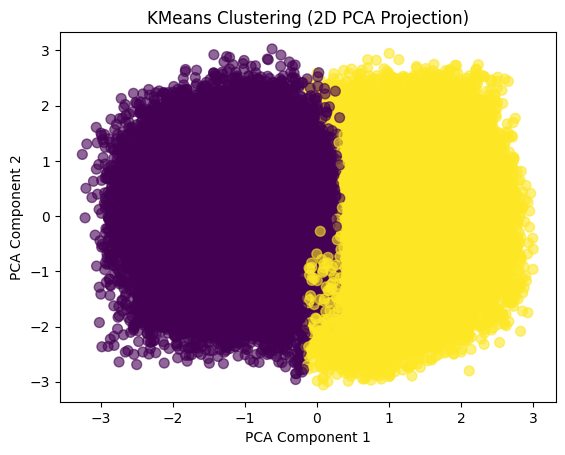

In [27]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, s=50, alpha=0.6)
plt.title("KMeans Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()